# 판다스 내장 그래프 도구
판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 import하지 않고,
## 간단히 그래프 그릴 수 있음.
선그래프 : plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림.
막대 그래프 : plot(kind='bar')
히스토그램 : plot(kind='hist')
산점도 : plot(x=' ', y=' ', kind='scatter'), 상관관계를 볼 수 있음.
박스 플롯 : plot(kind='box'), 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공.

In [2]:
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv('C:/caba2012/workspace/Caba_시각화/dataset/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [ ]:
# Q. NDate 칼럼을 datetime 타입으로 생성하고 인덱스로 셋팅하세요.

In [ ]:
# datetime으로 변환
# to_datetime() 함수의 argument로 df의 Date컬럼을 넘겨줍니다.

In [ ]:
시계열 데이터
df의 행인덱스로 사용하면 시간으로 기록된 데이터를 분석하는 것이 매우 유용.
특정 시점을 기록하는 Timesstamp와 두 시점 사이의 일정한 기간을 나타내는 Period가 있음.
문자열 또는 숫자로 저장되어 있는 시간 데이터를 시계열 객체인 Timestamp로 변환하는 함수를 제공
판다스 to_datetime() 함수를 사용하면 문자열 등 다른 자료형을 판다스 Timestamp를 나타내는 datetime64 자료형으로 변환 가능.

In [32]:
df['NDate'] = pd.to_datetime(df.Date)
df.head()

,Date,Close,Start,High,Low,Volume,NDate
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26


In [33]:
df1 = df.set_index('NDate')
df1.drop(['Date','Volume'],axis=1,inplace=True) #axis=1 열기준
df1.head()

,Close,Start,High,Low
NDate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


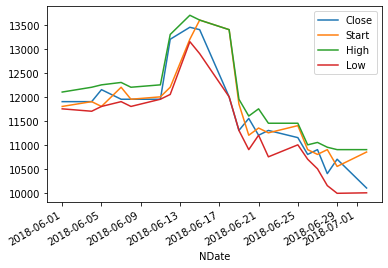

In [34]:
# 선그래프 : plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 
# 선 그래프를 그림
# NDate를 인덱스로 줘서, X축에 배치
df1.plot()

In [35]:
df1.head()

,Close,Start,High,Low
NDate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


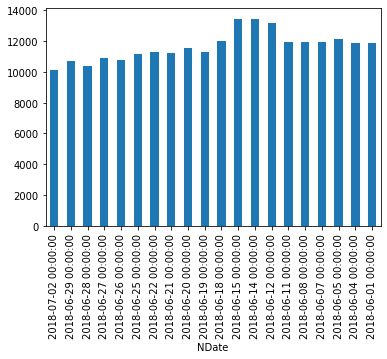

In [36]:
df1.Close.plot(kind='bar')

In [ ]:
# Q. NDate를 칼럼으로 전환하고 to_period(freq='D') 함수를 이용 일자를 
#  기준으로 새로운 칼럼 Date를 생성하세요.
# Q. Date를 인덱스로 셋팅하고 Close 칼럼으로 일별 막대 그래프를 표현하세요

In [37]:
df1.reset_index(inplace=True)
df1.head()

,NDate,Close,Start,High,Low
0,2018-07-02,10100,10850,10900,10000
1,2018-06-29,10700,10550,10900,9990
2,2018-06-28,10400,10900,10950,10150
3,2018-06-27,10900,10800,11050,10500
4,2018-06-26,10800,10900,11000,10700


In [38]:
df1['Date'] = df1.NDate.dt.to_period(freq='D')
df1.head()

,NDate,Close,Start,High,Low,Date
0,2018-07-02,10100,10850,10900,10000,2018-07-02
1,2018-06-29,10700,10550,10900,9990,2018-06-29
2,2018-06-28,10400,10900,10950,10150,2018-06-28
3,2018-06-27,10900,10800,11050,10500,2018-06-27
4,2018-06-26,10800,10900,11000,10700,2018-06-26


In [ ]:
# Q. Date를 인덱스로 셋팅하고 Close 칼럼으로 일별 막대 그래프를 표현하세요.

In [39]:
df1.set_index('Date', inplace=True)
df1.head()

,NDate,Close,Start,High,Low
Date,,,,,
2018-07-02,2018-07-02,10100,10850,10900,10000
2018-06-29,2018-06-29,10700,10550,10900,9990
2018-06-28,2018-06-28,10400,10900,10950,10150
2018-06-27,2018-06-27,10900,10800,11050,10500
2018-06-26,2018-06-26,10800,10900,11000,10700


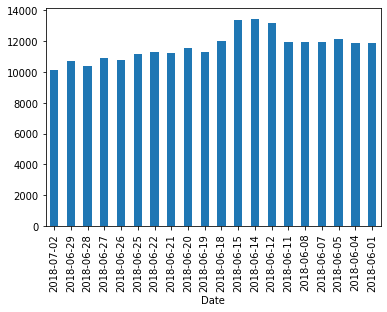

In [15]:
df1.Close.plot(kind='bar')

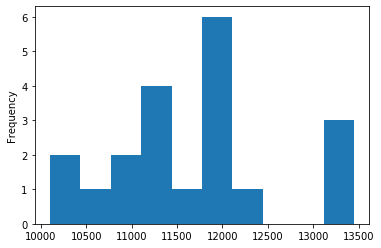

In [16]:
df1.Close.plot(kind='hist')

In [ ]:
# Q. df에서 Volume 칼럼의 분포를 탐색하는 히스토그램을 표현하세요.

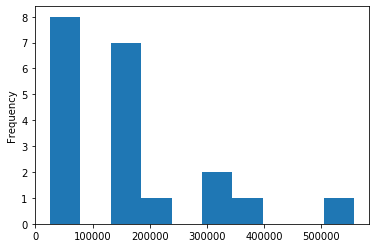

In [40]:
df.Volume.plot(kind='hist')

In [ ]:
# Q. Close칼럼과 Volume 칼럼으로 산점도를 표현하세요.

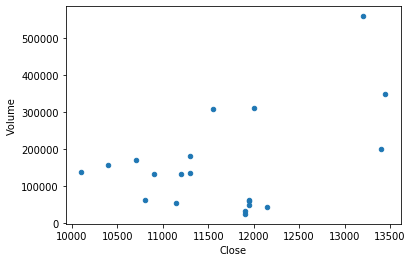

In [42]:
df.plot(x='Close', y='Volume', kind='scatter')

In [ ]:
# Q. Close칼럼과 Start 칼럼의 분포 및 이상치 여부를 탐색하는 Box plot을 표현하세요.

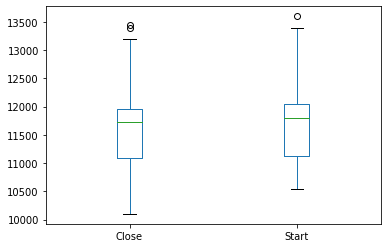

In [43]:
df[['Close', 'Start']].plot(kind='box')

In [45]:
df_ep = pd.read_excel('dataset/df_ep.xlsx',engine='openpyxl')
df_ep.head(2)

,year,south,north
0,1990,1077,277
1,1991,1186,263


Q. df_ep 데이터프레임으로 다음을 수행하세요.
- 선그래프
- 'south' 칼럼의 막대그래프
- 'south' 칼럼의 히스토그램
- box plot

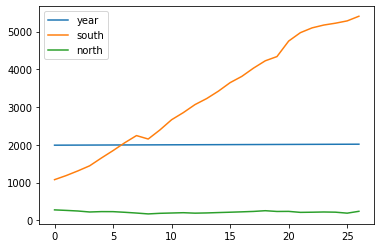

In [46]:
df_ep.plot()

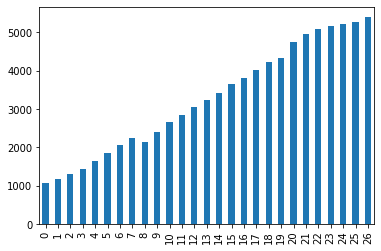

In [47]:
df_ep.south.plot(kind='bar')

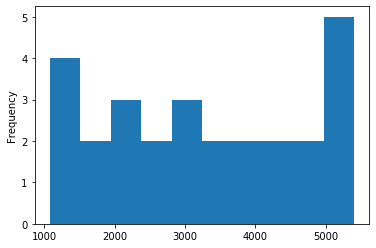

In [48]:
df_ep.south.plot(kind='hist')

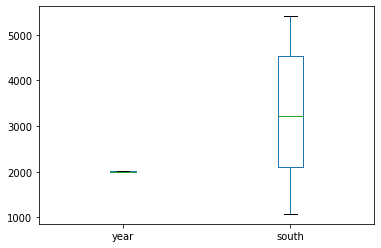

In [52]:
df_ep[['year', 'south']].plot(kind='box')

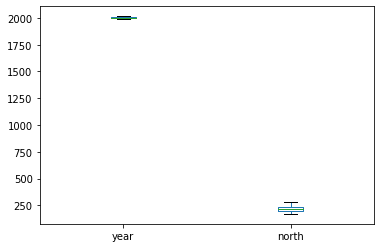

In [53]:
df_ep[['year', 'north']].plot(kind='box')

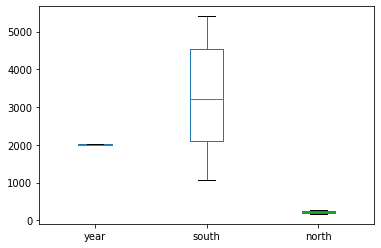

In [54]:
df_ep.plot(kind='box')

In [ ]:
# 과제
# df_auto의 각 칼럼을 시각화해서 탐색한 후 인사이트를 기술하세요.(5개 이상)
# auto-mpg에서 5개 이상의 인사이트 도출.
# mpg는 연비(갤런당 마일, (갤런: 3.8리터(액량), 마일(거리))
# 자동차용어: https://kidshyundai.tistory.com/930

In [55]:
df_auto = pd.read_excel('C:/caba2012/workspace/Caba_시각화/dataset/auto-mpg.xlsx')

In [91]:
df_auto.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [65]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


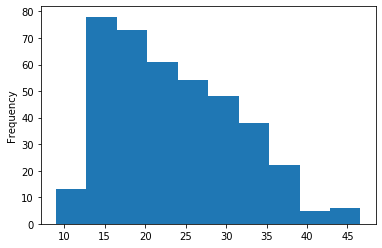

In [59]:
df_auto.mpg.plot(kind='hist')

In [ ]:
# mpg(갤런 당 마일: 연비)가 15~25인 차량이 많다.

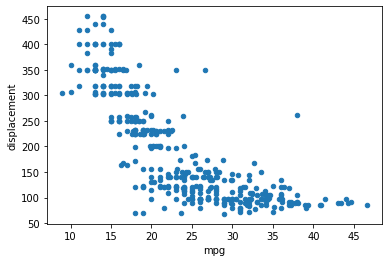

In [60]:
df_auto.plot(x='mpg', y='displacement', kind='scatter')

In [ ]:
# 배기량이 크면 mpg가 작다

In [64]:
df_auto.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [67]:
df_auto.horsepower.replace('?',np.nan, inplace=True)

In [68]:
df_auto.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [69]:
df_auto.horsepower.astype('float')

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

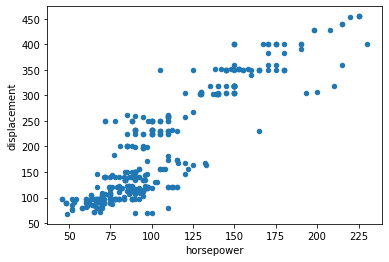

In [70]:
df_auto.plot(x='horsepower', y='displacement', kind='scatter')

In [ ]:
# 마력이 클수록 배기량이 크다

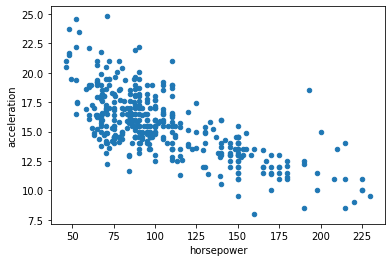

In [92]:
df_auto.plot(x='horsepower', y='acceleration', kind='scatter')

In [ ]:
# 마력이 높을수록 자동차의 속도가 더 빨라지게 된다는데...
# 왜 그래프가 이렇게 나왔을까???

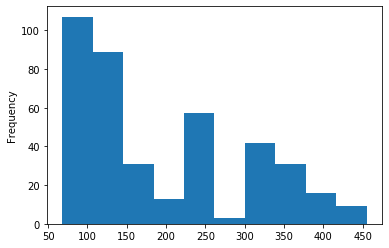

In [74]:
df_auto.displacement.plot(kind='hist')

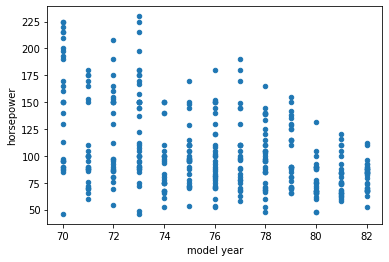

In [90]:
df_auto.plot(x='model year', y='horsepower', kind='scatter')

In [ ]:
# 연식이 최식일수록 기술이 발달하여 horsepower와 model year가 
# 양의 상관관계를 가질 것으로 추측했으나,
# 그래프상으로는 horsepower와 model year이 오히려 음의 상관관계를 보이는 경향이 있다.
# 82년도 model year에 horsepower가 낮은 표본만 데이터에 담겨져 그런것일까...?

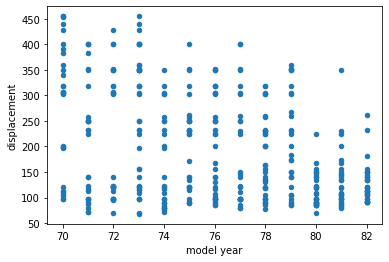

In [93]:
df_auto.plot(x='model year', y='displacement', kind='scatter')

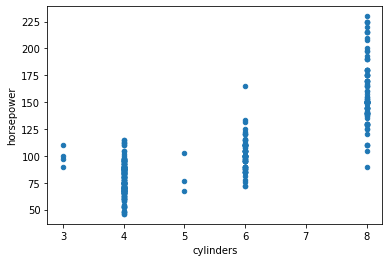

In [77]:
df_auto.plot(y='horsepower', x='cylinders', kind='scatter')

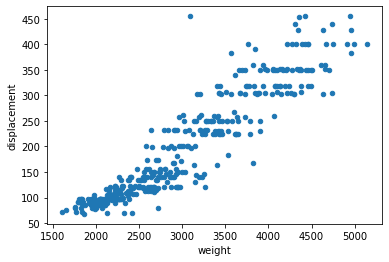

In [79]:
df_auto.plot(x='weight', y='displacement', kind='scatter')

In [ ]:
# weight가 클수록 배기량이 높다
# weight가 높을수록 엔진도 튼튼하게 만들 수 있어서인가...?

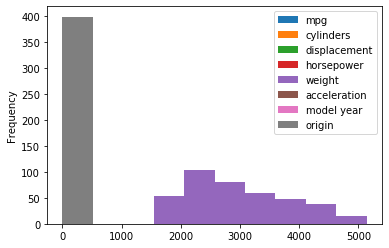

In [86]:
df_auto.plot(kind='hist')

In [83]:
# 이 표를 보고도 인사이트를 도출할 수 있는건가...?
df_auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


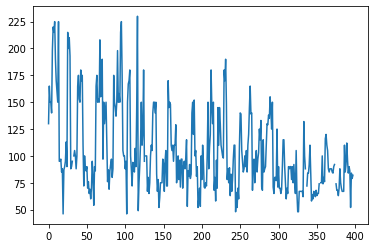

In [138]:
df_auto['horsepower'].plot()

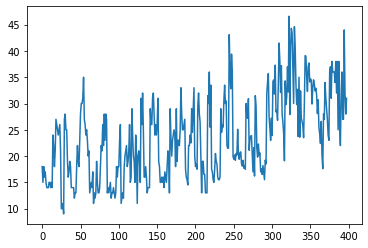

In [95]:
df_auto['mpg'].plot()

[Random 함수]

np.random.seed # seed를 통한 난수 생성
np.random.randint # 균일분포의 정수 난수 1개 생성
np.random.rand # 0부터 1사이의 균일분포에서 난수 매트릭스 array 생성
np.random.randn # 가우시안 표준 정규 분포에서 난수 매트릭스 array 생성
np.random.shuffle # 기존의 데이터의 순서 바꾸기
np.random.choice # 기존의 데이터에서 sampling

In [96]:
data = np.random.rand(10000)
data[:10]

array([0.19187872, 0.89201195, 0.76246582, 0.73284561, 0.69485092,
       0.82483092, 0.98905908, 0.35930889, 0.90859581, 0.44594453])

In [97]:
# 0부터 1000사이의 균일분포를 이루는 난수 생성
data = np.random.rand(10000)*1000
data[:10]
df = pd.DataFrame(data,columns=['Num'])
print(df.head())
df.describe()

          Num
0  205.458385
1  602.611359
2  286.515939
3  342.888537
4  159.351406


,Num
count,10000.000000
mean,498.958495
std,289.776937
min,0.129853
25%,246.764001
50%,498.707243
75%,746.370479
max,999.922026


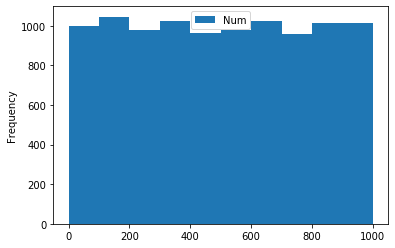

In [98]:
df.plot(kind='hist')

In [ ]:
# 정규분포는 연속확률분포로서 가장 자주 쓰이는 확률분포입니다. 
# 모양은 평균을 중심으로 하나의 봉우리형태를 띄며 한 집단의 많은 사람들의 키, 몸무게, 시험성적 등의 데이터에 잘 나타나는 분포입니다. 
# 가우시안(Gausssian) 분포라고 불리며 위치모수는 평균(μ)와 모양모수 표준편차(σ)을 가집니다.

In [99]:
# 평균 0, 표준편차 1인 표준정규분포 난수
data = np.random.randn(10000)
df = pd.DataFrame(data, columns=['Num'])
print(df.head())
df.describe()

        Num
0  1.956219
1 -1.624378
2 -1.187874
3 -1.577776
4  0.821661


,Num
count,10000.000000
mean,0.011058
std,1.004062
min,-3.480825
25%,-0.658931
50%,0.013997
75%,0.691872
max,3.771641


In [100]:
from scipy import stats
np.random.seed(1)
# 평균 10, 표쥰편차 2인 정규분포의 난수 10000개 생성
sample1 = stats.norm.rvs(loc=10, scale=2, size=10000)
df1 = pd.DataFrame(sample1, columns=['Num'])
print(df1.head())
df1.describe()

         Num
0  13.248691
1   8.776487
2   8.943656
3   7.854063
4  11.730815


,Num
count,10000.000000
mean,10.019545
std,1.997672
min,2.687120
25%,8.674150
50%,10.016908
75%,11.343618
max,18.053698


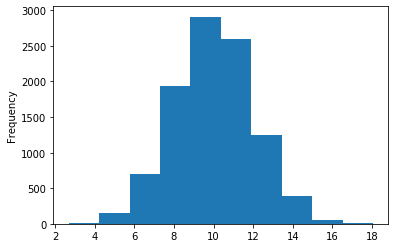

In [101]:
df1.Num.plot(kind='hist')

## matplotlib
histogram : plt.hist(x, bins= )
line plot : plt.plot(x,y)
plt.bar(x,y, width= , color='')
barh plot ; df.plot(kind='barh')
scatter plot : plt.scatter(x, y)
box plot : df.boxplot(column=['feature'])

In [8]:
import matplotlib.pyplot as plt

In [107]:
x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])

In [108]:
# 그래프 사이즈
plt.figure(figsize=(8,4))

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

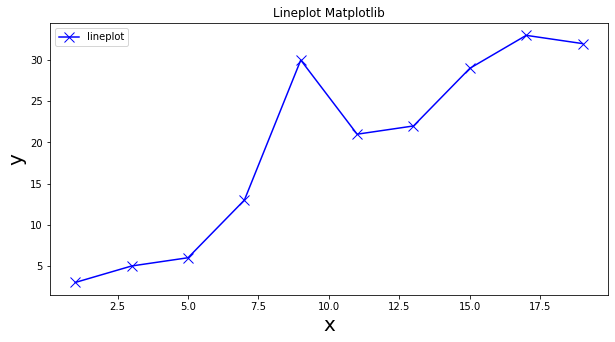

In [118]:
plt.figure(figsize=(10, 5))
plt.plot(x,y, color='blue', marker='x', markersize=10)
plt.title('Lineplot Matplotlib')
# plt.xlabel('x값', size=20)
# plt.ylabel('y값', size=20)
# 한글이 들어가면 오류가 발생한다.
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)
#범례
plt.legend(labels=['lineplot']) 

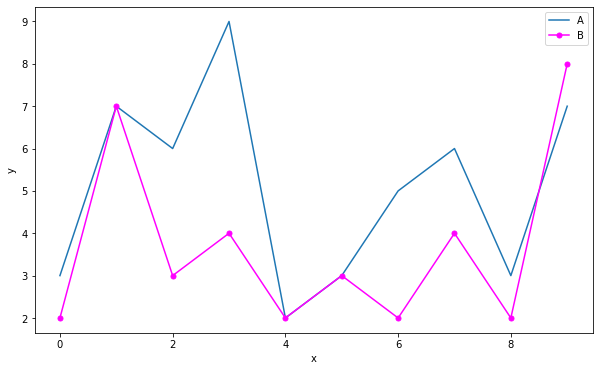

In [124]:
np.random.seed(10)
x = np.arange(10)
y1 = np.random.randint(2, 10, size=10)
y2 = np.random.randint(2, 10, size=10)
plt.figure(figsize=(10, 6))
#line plot: plt.plot(x,y)
plt.plot(x, y1)
plt.plot(x, y2, color='magenta', marker='o', markersize=5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['A', 'B'])

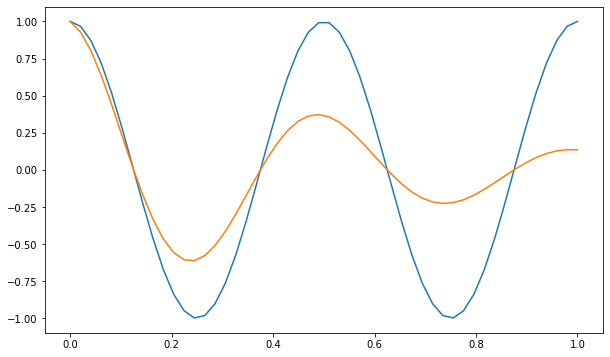

In [125]:
x = np.linspace(0,1,50)
y1 = np.cos(4*np.pi*x)
y2 = np.cos(4*np.pi*x)*np.exp(-2*x)
plt.figure(figsize=(10,6))
plt.plot(x, y1)
plt.plot(x, y2)
# plt.xlabel('x')
# plt.ylabel('y')

In [ ]:
# cumsum 정리

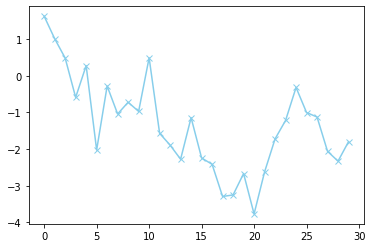

In [109]:
from numpy.random import randn
np.random.seed(1)
plt.plot(randn(30).cumsum(), color='skyblue', marker='x')
# plt.plot(randn(30).cumsum(), linestyle='dashed', color='blue', marker='o') #cumsum:누계

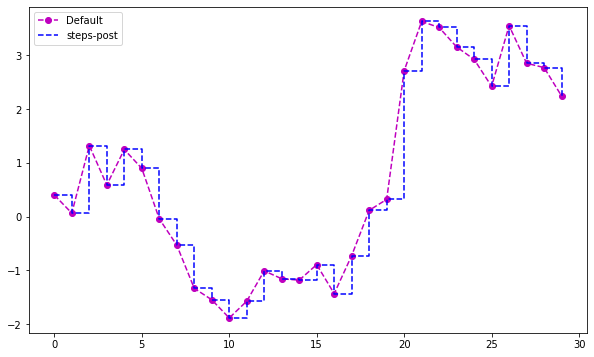

In [128]:
data = np.random.randn(30).cumsum()
plt.figure(figsize=(10,6))
plt.plot(data, 'm--', marker='o', label='Default')
plt.plot(data, 'b--', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

Text(0.5, 0, 'x')

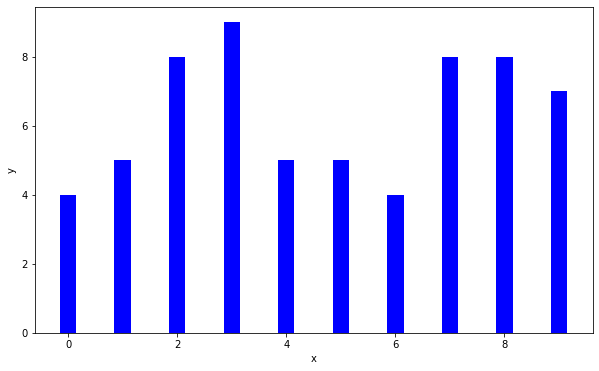

In [132]:
y = np.random.randint(2,10, size=10)
x = range(len(y))
plt.figure(figsize=(10,6))
plt.bar(x,y,width=0.3,color='blue')
plt.ylabel('y')
plt.xlabel('x')

In [131]:
y = np.random.randint(2,10, size=10)
y

array([9, 7, 3, 2, 6, 6, 8, 8, 8, 2])

In [115]:
# 각 로우의 값을 묶어서 그룹별 막대그래프로 표현
df = pd.DataFrame(np.random.rand(6,4), index=['one', 'two', 'three', 'four', 'five', 'six'],
                columns = ['A', 'B', 'C', 'D'])

In [116]:
print(df)

              A         B         C         D
one    0.139276  0.807391  0.397677  0.165354
two    0.927509  0.347766  0.750812  0.725998
three  0.883306  0.623672  0.750942  0.348898
four   0.269928  0.895886  0.428091  0.964840
five   0.663441  0.621696  0.114746  0.949489
six    0.449912  0.578390  0.408137  0.237027


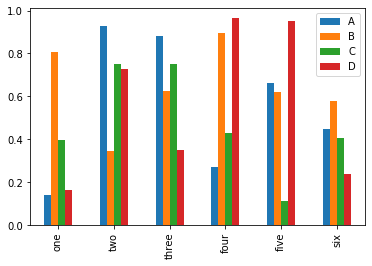

In [117]:
df.plot.bar()

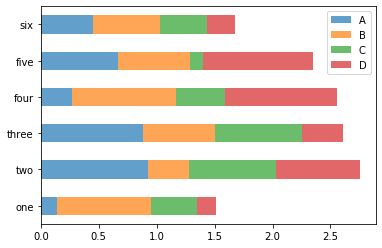

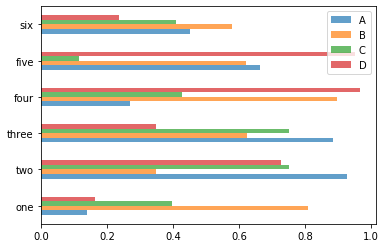

In [128]:
# bar(수직막대), barh(수평막대) 그래프
# stacked은 그래프가 겹쳐지도록 해준다, alpha는 투명도
# df.plot.barh(stacked=True, alpha=0.7)
df.plot.barh(stacked=True, alpha=0.7) 
df.plot.barh(alpha=0.7) 

a    0.805756
b    0.604593
c    0.478484
d    0.433118
e    0.974312
f    0.205190
g    0.934504
h    0.452161
i    0.414495
j    0.409596
k    0.115420
l    0.332379
m    0.293505
n    0.780537
o    0.772780
p    0.726144
dtype: float64


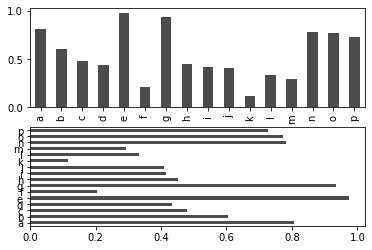

In [5]:
# bar(수직막대), barh(수평막대) 그래프

fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
print(data)
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

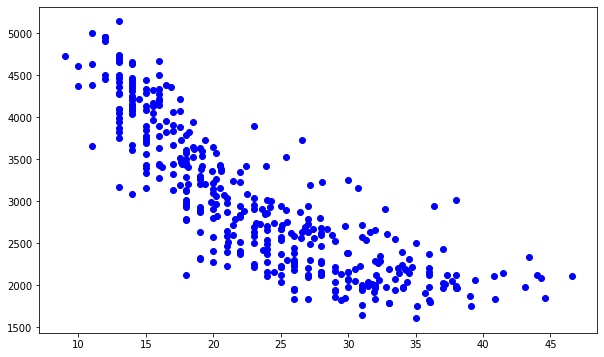

In [6]:
# scatter plot
df_auto = pd.read_excel('dataset/auto-mpg.xlsx',engine='openpyxl')
x=df_auto.mpg
y=df_auto.weight
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='blue')

(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <a list of 10 Patch objects>)

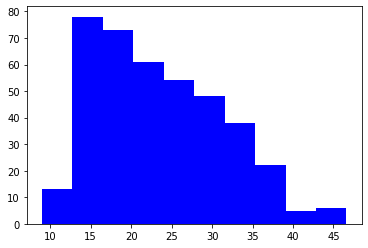

In [11]:
# histogram
# bins: 히스토그램의 계급을 나눠준다.
plt.hist(x,bins=10,color='blue')

In [14]:
df_auto.mpg.shape

(398,)

In [12]:
df_auto.mpg.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [17]:
df_auto.mpg.max()

46.6

In [18]:
df_auto.mpg.count()

398

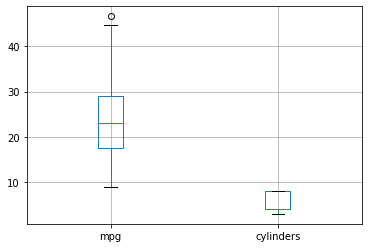

In [15]:
# box plot
df_auto.boxplot(column=['mpg','cylinders'])
# df_auto.boxplot(column=['cylinders'])

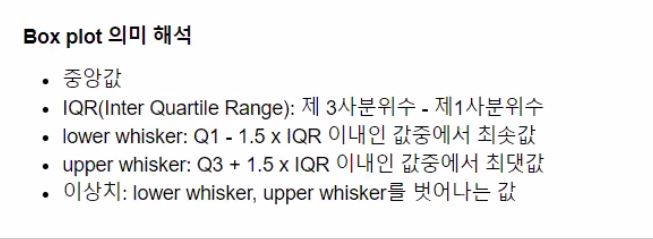

In [144]:
Image("C:/Users/user/Desktop/caba_2015_필기/day23/중앙값.JPG")

In [ ]:
# 중앙값은 50%(2사분위수)
# median값

In [19]:
u_whisker_check = 29 + 11.5*1.5
print(u_whisker_check)
# mpg 내림차순 정렬
mpg = df_auto.mpg.sort_values(ascending=False)
mpg[:5]
print('upper whisker : 44.6')
print('이상치 : {}'.format(df_auto.mpg[df_auto.mpg>44.6]))

46.25
upper whisker : 44.6
이상치 : 322    46.6
Name: mpg, dtype: float64


In [24]:
# sort_value: 객체를 값에 따라 정렬
mpg = df_auto.mpg.sort_values(ascending=False)
mpg[:5]

322    46.6
329    44.6
325    44.3
394    44.0
326    43.4
Name: mpg, dtype: float64

In [25]:
mpg = df_auto.mpg.sort_values(ascending=True)
mpg[:5]

28      9.0
25     10.0
26     10.0
103    11.0
124    11.0
Name: mpg, dtype: float64

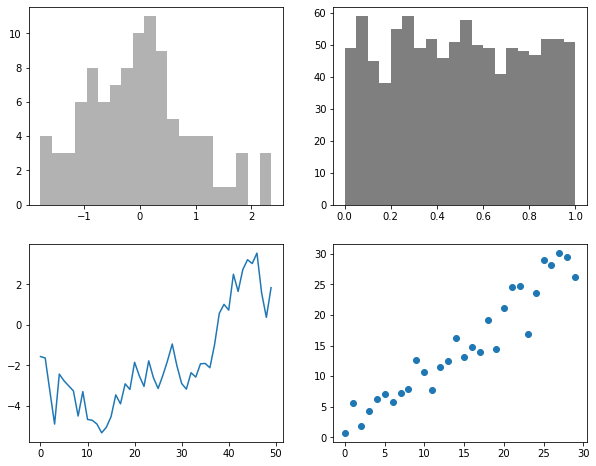

In [29]:
# fig = plt.figure(figsize=(12,8))

fig = plt.figure(figsize=(10,8))

# figure 2X2 크기이고, 4개의 서브플롯
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.hist(np.random.rand(1000), bins=20, color='k', alpha=0.5)
# ax3.plot(np.random.randn(50).cumsum(), 'k--') #'k--'는 점선
ax3.plot(np.random.randn(50).cumsum())
ax4.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C39A48E688>,
      dtype=object)

<Figure size 864x576 with 0 Axes>

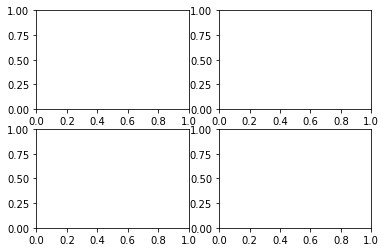

In [32]:
# 특정한 배치에 맞추어 여러 개의 서브플롯을 포함하는 figure 생성
fig = plt.figure(figsize=(12,8))
fig, axes = plt.subplots(2,2)
axes

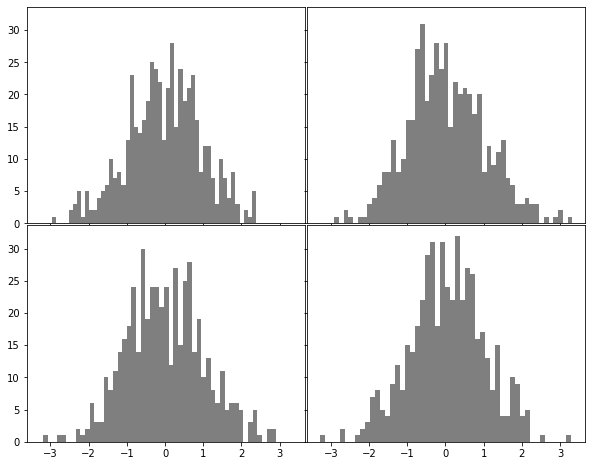

In [35]:
fig, axes = plt.subplots(2,2, figsize=(10,8), sharex=True, sharey=True)

# fig, axes = plt.subplots(2,2, figsize=(10,8))
# color = 'k'는 블랙을 의미
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)

#각각의 그래프간의 간격 조정, wspace = 넓이, hspace = 높이
plt.subplots_adjust(wspace=0.01, hspace=0.01)

[과제]
Q. 시각화 탐색을 통하여 df의 각 칼럼에 대한 인사이트를 기술하세요(5가지 이상)

In [ ]:
# 인사이트 탐색시 주요 Points
# - 의미없는 변수
# - 종속변수인 survived와 상관관계가 높은 변수
# - 분석에 의미있는 파생변수 생성

In [158]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [6]:
data = np.random.randn(1000)
cdata = data.cumsum()
cdata[:10]

array([-0.64151032, -0.36868331, -1.84541869, -1.79245167, -0.71656024,
        0.96560374,  0.44887853,  1.94067267,  0.60513495, -0.48351512])

Text(0.5, 0, 'Stages')

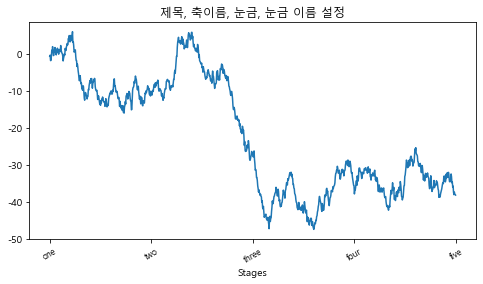

In [13]:
import warnings
warnings.filterwarnings('ignore')
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "dataset/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
ax.plot(cdata)
ticks = ax.set_xticks([0,250,500,750,1000]) #x수치 배치
labels = ax.set_xticklabels(['one','two','three','four','five'],
                            rotation=30, fontsize='small')
ax.set_title('제목, 축이름, 눈금, 눈금 이름 설정')
ax.set_xlabel('Stages')

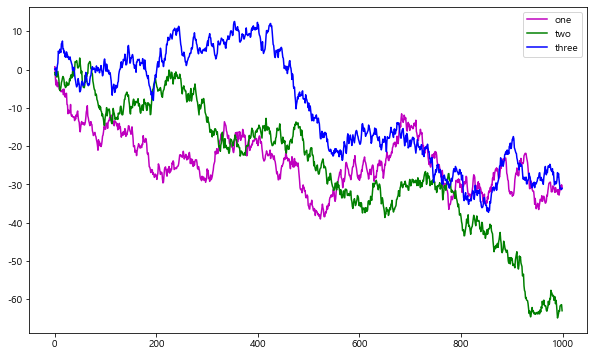

In [18]:
from numpy.random import randn
fig = plt.figure(figsize=(10,6)); ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'm', label='one')
ax.plot(randn(1000).cumsum(), 'g', label='two')
ax.plot(randn(1000).cumsum(), 'b', label='three')
plt.legend(loc="best")